<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Imports</h1>

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
audioAndText = pd.read_csv('Collected Datasets/audioAndText.csv')
text = pd.read_csv('Collected Datasets/text.csv')

In [ ]:
def filterByMfccLength(df, maxLength=140, mfccColumn='mfcc'):
    def mfccLength(mfccStr):
        mfccVals = np.array(list(map(float, mfccStr.split(','))))
        return mfccVals.size // 13

    lengths = df[mfccColumn].apply(mfccLength)
    filteredDf = df[lengths <= maxLength].copy()
    return filteredDf


audioAndText = filterByMfccLength(audioAndText)


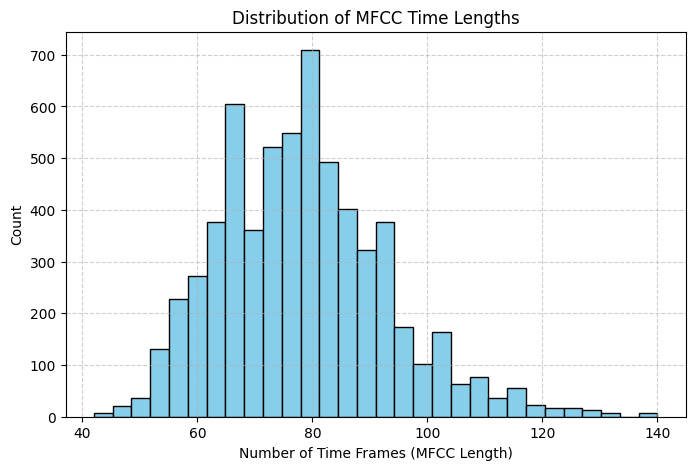

In [22]:
def plotMfccLengthsWithStats(df):
    lengths = []
    for mfcc_str in df['mfcc']:
        mfcc_vals = np.array(list(map(float, mfcc_str.split(','))))
        time_steps = mfcc_vals.size // 13  
        lengths.append(time_steps)
    
    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of MFCC Time Lengths')
    plt.xlabel('Number of Time Frames (MFCC Length)')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plotMfccLengthsWithStats(audioAndText)


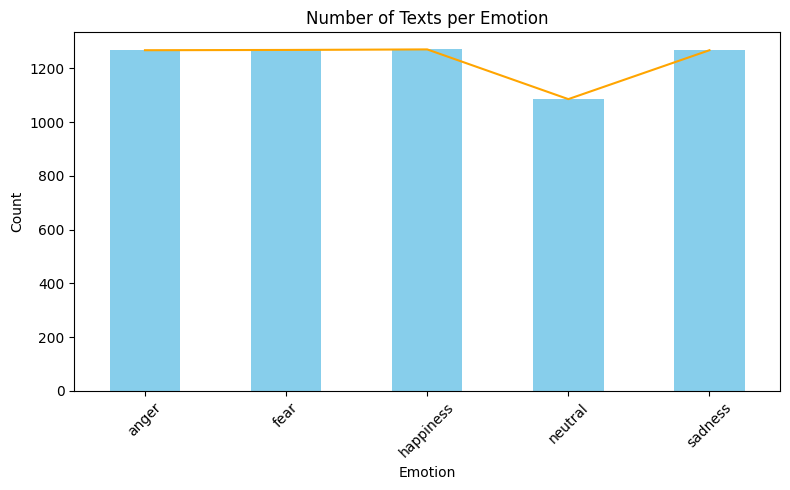

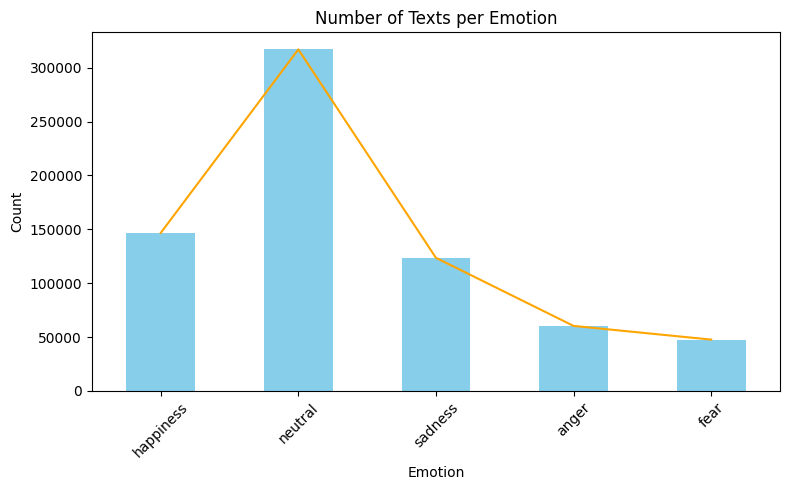

In [30]:
def plotEmotionCounts(df):
    emotionCounts = df.groupby('Emotion').size().reindex(df['Emotion'].unique())
    
    plt.figure(figsize=(8, 5))
    emotionCounts.plot(kind='bar', color='skyblue')
    
    plt.plot(range(len(emotionCounts)), emotionCounts.values, color='orange', label='Trend')

    
    plt.title('Number of Texts per Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotEmotionCounts(audioAndText)
plotEmotionCounts(text)
